# Supply Chain Emissions Modeling Using Industry and Commodity Data (2010–2016)

Problem Statement:

You have annual supply chain emission data from 2010–2016 categorized into industries and commodities. The goal is to develop a regression model that can predict the Supply Chain Emission Factors with Margins based on descriptive and quality metrics (substance, unit, reliability, temporal/geographical/technological/data collection correlations, etc.).

# 🌱 Greenhouse Gas Emission Prediction Project

![GHG Emissions](https://www.shalom-education.com/wp-content/uploads/2022/12/Shutterstock_1667551381-1-1024x1006.jpg)

**Project Goal:**  
To analyze and predict greenhouse gas (GHG) emissions from various U.S. industries and commodities using the official dataset from [data.gov](https://catalog.data.gov/dataset/supply-chain-greenhouse-gas-emission-factors-for-us-industries-and-commodities).

![GHG Emissions](https://edg.epa.gov/EPALogo.svg)

**Source:**  
[Supply Chain Greenhouse Gas Emission Factors](https://catalog.data.gov/dataset/supply-chain-greenhouse-gas-emission-factors-for-us-industries-and-commodities)

  
**Tools:** Python, Pandas, Scikit-learn, Matplotlib, Seaborn  


## 📂 Dataset Overview

This dataset contains supply chain emission factors associated with various U.S. industries and commodities.

**Key Columns:**
- `Code`: Industry classification code
- `Industry_Name`: Name of the industry
- `Commodity`: Item or commodity name
- `GHG_Emissions_kgCO2e`: GHG emissions per unit (kg CO2 equivalent)
- `Units`: Measurement units (e.g., [kg/2018 USD, purchaser price])



## 🧹 Data Preprocessing

Steps:
- Handle missing values
- Convert units where needed
- Encode categorical features
- Normalize/scale numeric columns

## 🤖 Model Building & Evaluation

We aim to predict `GHG_Emissions_kgCO2e` using regression models.

Models to try:
- Linear Regression
- Random Forest

**Evaluation Metrics:**
- RMSE (Root Mean Squared Error)
- MAE (Mean Absolute Error)
- R² Score


##### Steps:
- Step 1: Import Required Libraries
- Step 2: Load Dataset
- Step 3: Data Preprocessing (EDA+Cleaning+Encoding)
- Step 4: Training
- Step 5: Prediction and Evaluation
- Step 6: Hyperparameter Tuning
- Step 7: Comapartive Study and Slecting the Best model 


# Step 1: Import Required Libraries

In [6]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib


# Step 2: Load Dataset

In [7]:
excel_file = 'SupplyChainEmissionFactorsforUSIndustriesCommodities.xlsx'  # Replace with actual path
years = range(2010, 2017)

In [8]:
years[0]

2010

In [1]:
import pandas as pd
xls = pd.ExcelFile(r"C:/Users/HP/Downloads/SupplyChainEmissionFactorsforUSIndustriesCommodities (1).xlsx")
print(xls.sheet_names)
df_1 = pd.read_excel(r"C:/Users/HP/Downloads/SupplyChainEmissionFactorsforUSIndustriesCommodities (1).xlsx")
excel_file = r"C:/Users/HP/Downloads/SupplyChainEmissionFactorsforUSIndustriesCommodities (1).xlsx"
years = [2015, 2016]

df_1 = pd.read_excel(excel_file, sheet_name=f'{years[0]}_Detail_Commodity')
df_1.head()


['Cover', 'Contents', 'Data Dictionary', 'Sources', 'LCIA Factors of Other GHGs', '2016_Summary_Commodity', '2015_Summary_Commodity', '2014_Summary_Commodity', '2013_Summary_Commodity', '2012_Summary_Commodity', '2011_Summary_Commodity', '2010_Summary_Commodity', '2016_Summary_Industry', '2015_Summary_Industry', '2014_Summary_Industry', '2013_Summary_Industry', '2012_Summary_Industry', '2011_Summary_Industry', '2010_Summary_Industry', '2016_Detail_Commodity', '2015_Detail_Commodity', '2014_Detail_Commodity', '2013_Detail_Commodity', '2012_Detail_Commodity', '2011_Detail_Commodity', '2010_Detail_Commodity', '2016_Detail_Industry', '2015_Detail_Industry', '2014_Detail_Industry', '2013_Detail_Industry', '2012_Detail_Industry', '2011_Detail_Industry', '2010_Detail_Industry', 'Sheet1']


,Commodity Code,Commodity Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.354,0.063,0.417,NaN,3,2,1,4,1
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,2,1,1,1
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,2,1,4,1
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.003,0.000,0.003,NaN,3,2,1,4,1
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.659,0.069,0.728,NaN,4,2,1,4,1


In [2]:
df_2 = pd.read_excel(excel_file, sheet_name=f'{years[0]}_Detail_Industry')
df_2.head()

,Industry Code,Industry Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,1111A0,Oilseed farming,carbon dioxide,"kg/2018 USD, purchaser price",0.365,0.063,0.428,NaN,3,2,1,4,1
1,1111A0,Oilseed farming,methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,2,1,1,1
2,1111A0,Oilseed farming,nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,2,1,4,1
3,1111A0,Oilseed farming,other GHGs,"kg CO2e/2018 USD, purchaser price",0.003,0.000,0.003,NaN,3,2,1,4,1
4,1111B0,Grain farming,carbon dioxide,"kg/2018 USD, purchaser price",0.673,0.070,0.743,NaN,4,2,1,4,1


In [7]:
all_data = []

for year in years:
    try:
        df_com = pd.read_excel(excel_file, sheet_name=f'{year}_Detail_Commodity')
        df_ind = pd.read_excel(excel_file, sheet_name=f'{year}_Detail_Industry')
        
        df_com['Source'] = 'Commodity'
        df_ind['Source'] = 'Industry'
        df_com['Year'] = df_ind['Year'] = year
        
        df_com.columns = df_com.columns.str.strip()
        df_ind.columns = df_ind.columns.str.strip()

        df_com.rename(columns={
            'Commodity Code': 'Code',
            'Commodity Name': 'Name'
        }, inplace=True)
        
        df_ind.rename(columns={
            'Industry Code': 'Code',
            'Industry Name': 'Name'
        }, inplace=True)
        
        all_data.append(pd.concat([df_com, df_ind], ignore_index=True))
        
    except Exception as e:
        print(f"Error processing year {year}: {e}")

In [8]:
all_data[-1]

,Code,Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Year
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.323,0.066,0.389,NaN,3,2,1,4,1,Commodity,2016
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,2,1,1,1,Commodity,2016
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,2,1,4,1,Commodity,2016
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.003,0.000,0.003,NaN,4,2,1,4,1,Commodity,2016
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.658,0.073,0.731,NaN,4,2,1,4,1,Commodity,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3151,813B00,"Civic, social, professional, and similar organ...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.009,0.000,0.009,NaN,4,2,1,5,1,Industry,2016
3152,814000,Private households,carbon dioxide,"kg/2018 USD, purchaser price",0.000,0.000,0.000,NaN,4,2,1,5,1,Industry,2016
3153,814000,Private households,methane,"kg/2018 USD, purchaser price",0.000,0.000,0.000,NaN,4,2,1,5,1,Industry,2016
3154,814000,Private households,nitrous oxide,"kg/2018 USD, purchaser price",0.000,0.000,0.000,NaN,4,2,1,5,1,Industry,2016


In [9]:
len(all_data)

2

In [10]:
df = pd.concat(all_data, ignore_index=True)
df.head()

,Code,Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Year
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.354,0.063,0.417,NaN,3,2,1,4,1,Commodity,2015
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,2,1,1,1,Commodity,2015
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,2,1,4,1,Commodity,2015
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.003,0.000,0.003,NaN,3,2,1,4,1,Commodity,2015
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.659,0.069,0.728,NaN,4,2,1,4,1,Commodity,2015


In [11]:
len(df)

6312

# Step 3: Data Preprocessing

In [12]:
df.columns # Checking columns

Index(['Code', 'Name', 'Substance', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins', 'Unnamed: 7',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source', 'Year'],
      dtype='object')

In [13]:
df.isnull().sum()

Code                                                         0
Name                                                         0
Substance                                                    0
Unit                                                         0
Supply Chain Emission Factors without Margins                0
Margins of Supply Chain Emission Factors                     0
Supply Chain Emission Factors with Margins                   0
Unnamed: 7                                                6312
DQ ReliabilityScore of Factors without Margins               0
DQ TemporalCorrelation of Factors without Margins            0
DQ GeographicalCorrelation of Factors without Margins        0
DQ TechnologicalCorrelation of Factors without Margins       0
DQ DataCollection of Factors without Margins                 0
Source                                                       0
Year                                                         0
dtype: int64

## Week 2 - 23 June 2025 - S4F

In [14]:
# As there is no data avaialble in Unnamed coulmn so we will drop the column
df.drop(columns=['Unnamed: 7'],inplace=True)

In [15]:
df.columns

Index(['Code', 'Name', 'Substance', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source', 'Year'],
      dtype='object')

In [16]:
print(df.info())   # Checking data types and non-null counts 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6312 entries, 0 to 6311
Data columns (total 14 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Code                                                    6312 non-null   object 
 1   Name                                                    6312 non-null   object 
 2   Substance                                               6312 non-null   object 
 3   Unit                                                    6312 non-null   object 
 4   Supply Chain Emission Factors without Margins           6312 non-null   float64
 5   Margins of Supply Chain Emission Factors                6312 non-null   float64
 6   Supply Chain Emission Factors with Margins              6312 non-null   float64
 7   DQ ReliabilityScore of Factors without Margins          6312 non-null   int64  
 8   DQ TemporalCorrelation of Factors with

In [17]:
df.describe().T # Checking summary statistics 

,count,mean,std,min,25%,50%,75%,max
Supply Chain Emission Factors without Margins,6312.0,0.080922,0.253916,0.0,0.0,0.0020,0.043,6.450
Margins of Supply Chain Emission Factors,6312.0,0.011932,0.072751,0.0,0.0,0.0000,0.000,2.865
Supply Chain Emission Factors with Margins,6312.0,0.092872,0.274235,0.0,0.0,0.0025,0.048,6.501
DQ ReliabilityScore of Factors without Margins,6312.0,3.338086,0.503281,2.0,3.0,3.0000,4.000,4.000
DQ TemporalCorrelation of Factors without Margins,6312.0,2.000000,0.000000,2.0,2.0,2.0000,2.000,2.000
DQ GeographicalCorrelation of Factors without Margins,6312.0,1.000000,0.000000,1.0,1.0,1.0000,1.000,1.000
DQ TechnologicalCorrelation of Factors without Margins,6312.0,2.689322,1.164341,1.0,1.0,3.0000,3.000,5.000
DQ DataCollection of Factors without Margins,6312.0,1.000000,0.000000,1.0,1.0,1.0000,1.000,1.000
Year,6312.0,2015.500000,0.500040,2015.0,2015.0,2015.5000,2016.000,2016.000


In [18]:
df.isnull().sum() # Checking for null values in each column 

Code                                                      0
Name                                                      0
Substance                                                 0
Unit                                                      0
Supply Chain Emission Factors without Margins             0
Margins of Supply Chain Emission Factors                  0
Supply Chain Emission Factors with Margins                0
DQ ReliabilityScore of Factors without Margins            0
DQ TemporalCorrelation of Factors without Margins         0
DQ GeographicalCorrelation of Factors without Margins     0
DQ TechnologicalCorrelation of Factors without Margins    0
DQ DataCollection of Factors without Margins              0
Source                                                    0
Year                                                      0
dtype: int64

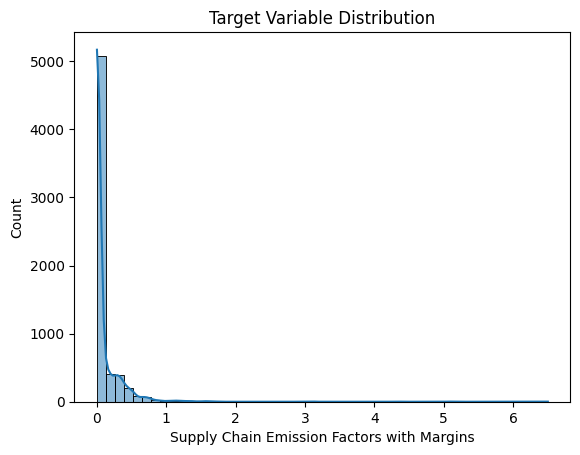

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize distribution
sns.histplot(df['Supply Chain Emission Factors with Margins'], bins=50, kde=True)
plt.title('Target Variable Distribution')
plt.show()

In [25]:
# Check categorical variables
print(df['Substance'].value_counts())

Substance
carbon dioxide    1578
methane           1578
nitrous oxide     1578
other GHGs        1578
Name: count, dtype: int64


In [26]:
print(df['Unit'].value_counts()) # Checking unique values in 'Unit' with count 

Unit
kg/2018 USD, purchaser price         4734
kg CO2e/2018 USD, purchaser price    1578
Name: count, dtype: int64


In [27]:
print(df['Unit'].unique()) # Checking unique values in 'Unit'

['kg/2018 USD, purchaser price' 'kg CO2e/2018 USD, purchaser price']


In [28]:
print(df['Source'].value_counts()) # Checking unique values in 'Source' with count 

Source
Industry     3160
Commodity    3152
Name: count, dtype: int64


In [29]:
df['Substance'].unique() # Checking unique values in 'Substance' 

array(['carbon dioxide', 'methane', 'nitrous oxide', 'other GHGs'],
      dtype=object)

In [30]:
substance_map={'carbon dioxide':0, 'methane':1, 'nitrous oxide':2, 'other GHGs':3} # Mapping substances to integers 

In [31]:
df['Substance']=df['Substance'].map(substance_map) 

In [32]:
df['Substance'].unique() # Checking unique values in 'Substance' 

array([0, 1, 2, 3])

In [33]:
print(df['Unit'].unique()) # Checking unique values in 'Unit' 

['kg/2018 USD, purchaser price' 'kg CO2e/2018 USD, purchaser price']


In [34]:
unit_map={'kg/2018 USD, purchaser price':0, 'kg CO2e/2018 USD, purchaser price':1} # Mapping units to integers 

In [35]:
df['Unit']=df['Unit'].map(unit_map)

In [36]:
print(df['Unit'].unique()) # Checking unique values in 'Unit' 

[0 1]


In [37]:
print(df['Source'].unique()) # Checking unique values in 'Source' 

['Commodity' 'Industry']


In [38]:
source_map={'Commodity':0, 'Industry':1} # Mapping sources to integers 

In [39]:
df['Source']=df['Source'].map(source_map)   # applying the mapping to 'Source' column 

In [40]:
print(df['Source'].unique()) # Checking unique values in 'Source' 

[0 1]


In [41]:
df.info() # Checking data types and non-null counts after mapping 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6312 entries, 0 to 6311
Data columns (total 14 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Code                                                    6312 non-null   object 
 1   Name                                                    6312 non-null   object 
 2   Substance                                               6312 non-null   int64  
 3   Unit                                                    6312 non-null   int64  
 4   Supply Chain Emission Factors without Margins           6312 non-null   float64
 5   Margins of Supply Chain Emission Factors                6312 non-null   float64
 6   Supply Chain Emission Factors with Margins              6312 non-null   float64
 7   DQ ReliabilityScore of Factors without Margins          6312 non-null   int64  
 8   DQ TemporalCorrelation of Factors with

In [42]:
df.Code.unique() # Checking unique values in 'Code' df['Code']

array(['1111A0', '1111B0', '111200', '111300', '111400', '111900',
       '112120', '1121A0', '112300', '112A00', '113000', '114000',
       '115000', '211000', '212100', '212230', '2122A0', '212310',
       '2123A0', '213111', '21311A', '221100', '221200', '221300',
       '230301', '230302', '233210', '233230', '233240', '233262',
       '2332A0', '2332C0', '2332D0', '233411', '233412', '2334A0',
       '311111', '311119', '311210', '311221', '311224', '311225',
       '311230', '311300', '311410', '311420', '311513', '311514',
       '31151A', '311520', '311615', '31161A', '311700', '311810',
       '3118A0', '311910', '311920', '311930', '311940', '311990',
       '312110', '312120', '312130', '312140', '312200', '313100',
       '313200', '313300', '314110', '314120', '314900', '315000',
       '316000', '321100', '321200', '321910', '3219A0', '322110',
       '322120', '322130', '322210', '322220', '322230', '322291',
       '322299', '323110', '323120', '324110', '324121', '3241

In [43]:
df.Name.unique() # Checking unique values in 'Name' 

array(['Fresh soybeans, canola, flaxseeds, and other oilseeds',
       'Fresh wheat, corn, rice, and other grains',
       'Fresh vegetables, melons, and potatoes',
       'Fresh fruits and tree nuts',
       'Greenhouse crops, mushrooms, nurseries, and flowers',
       'Tobacco, cotton, sugarcane, peanuts, sugar beets, herbs and spices, and other crops',
       'Dairies', 'Cattle ranches and feedlots', 'Poultry farms',
       'Animal farms and aquaculture ponds (except cattle and poultry)',
       'Timber and raw forest products', 'Wild-caught fish and game',
       'Agriculture and forestry support', 'Unrefined oil and gas',
       'Coal', 'Copper, nickel, lead, and zinc',
       'Iron, gold, silver, and other metal ores', 'Dimensional stone',
       'Sand, gravel, clay, phosphate, other nonmetallic minerals',
       'Well drilling', 'Other support activities for mining',
       'Electricity', 'Natural gas',
       'Drinking water and wastewater treatment',
       'Nonresidential mai

In [44]:
len(df.Name.unique()) # Checking number of unique values in 'Name' 

713

##### Top 10 Emmiting Industry

In [45]:
top_emitters = df[['Name', 'Supply Chain Emission Factors with Margins']].groupby('Name').mean().sort_values(
    'Supply Chain Emission Factors with Margins', ascending=False).head(10) 

# Resetting index for better plotting
top_emitters = top_emitters.reset_index()

In [46]:
top_emitters

,Name,Supply Chain Emission Factors with Margins
0,Cement manufacturing,1.620000
1,Cement,1.275250
2,"Electric power generation, transmission, and d...",1.085375
3,Electricity,0.904750
4,"Dolls, toys, and games",0.778125
5,Lime and gypsum products,0.765625
6,Lime and gypsum product manufacturing,0.748125
7,Industrial gas manufacturing,0.516250
8,Compressed Gases,0.474750
9,Clothing,0.434375


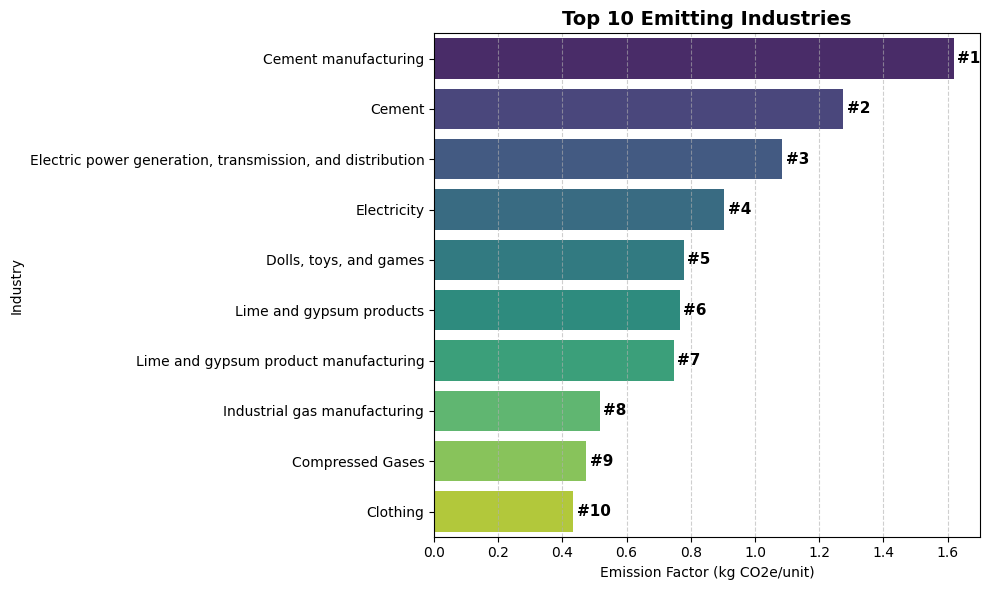

In [47]:
# Plotting the top 10 emitting industries


plt.figure(figsize=(10,6))
# Example: Top emitting industries (already grouped)
sns.barplot(
    x='Supply Chain Emission Factors with Margins',
    y='Name',
    data=top_emitters,
    hue='Name',
    palette='viridis'  # Use 'Blues', 'viridis', etc., for other color maps
)

# Add ranking labels (1, 2, 3...) next to bars
for i, (value, name) in enumerate(zip(top_emitters['Supply Chain Emission Factors with Margins'], top_emitters.index), start=1):
    plt.text(value + 0.01, i - 1, f'#{i}', va='center', fontsize=11, fontweight='bold', color='black')

plt.title('Top 10 Emitting Industries', fontsize=14, fontweight='bold') # Title of the plot 
plt.xlabel('Emission Factor (kg CO2e/unit)') # X-axis label
plt.ylabel('Industry') # Y-axis label
plt.grid(axis='x', linestyle='--', alpha=0.6) # Adding grid lines for better readability
plt.tight_layout() # Adjust layout to prevent overlap

plt.show()

##### Drop non-numeric columns not needed,
##### Alos drop Code and Year columns since there is no need of both of the columns

In [48]:

df.drop(columns=['Name','Code','Year'], inplace=True) 

In [49]:
df.head(1)

,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source
0,0,0,0.354,0.063,0.417,3,2,1,4,1,0


In [50]:
df.shape

(6312, 11)

##### Define features and target

In [51]:
df.columns

Index(['Substance', 'Unit', 'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source'],
      dtype='object')

In [52]:
X = df.drop(columns=['Supply Chain Emission Factors with Margins']) # Feature set excluding the target variable
y = df['Supply Chain Emission Factors with Margins'] # Target variable 

In [53]:
X.head()

,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source
0,0,0,0.354,0.063,3,2,1,4,1,0
1,1,0,0.001,0.001,4,2,1,1,1,0
2,2,0,0.002,0.000,4,2,1,4,1,0
3,3,1,0.003,0.000,3,2,1,4,1,0
4,0,0,0.659,0.069,4,2,1,4,1,0


In [54]:
y.head()

0    0.417
1    0.002
2    0.002
3    0.003
4    0.728
Name: Supply Chain Emission Factors with Margins, dtype: float64

### Univariate Analysis

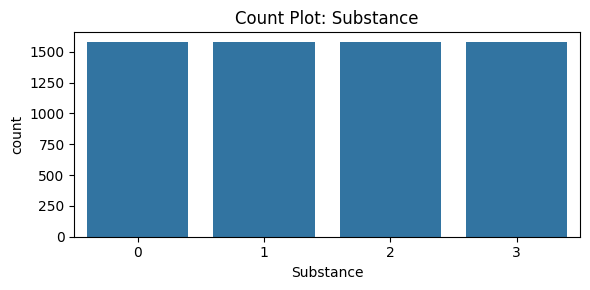

In [55]:
# Count plot for Substance
plt.figure(figsize=(6, 3))
sns.countplot(x=df["Substance"])
plt.title("Count Plot: Substance")
plt.xticks()
plt.tight_layout()
plt.show()

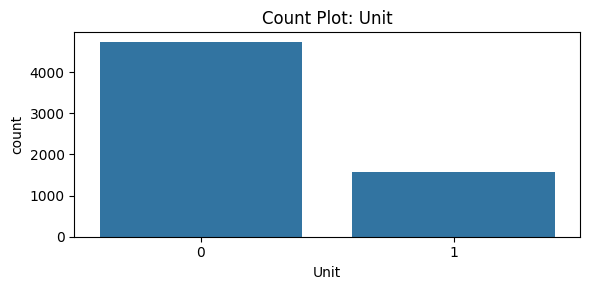

In [56]:
# Count plot for Unit
plt.figure(figsize=(6, 3))
sns.countplot(x=df["Unit"])
plt.title("Count Plot: Unit")
plt.tight_layout()
plt.show()


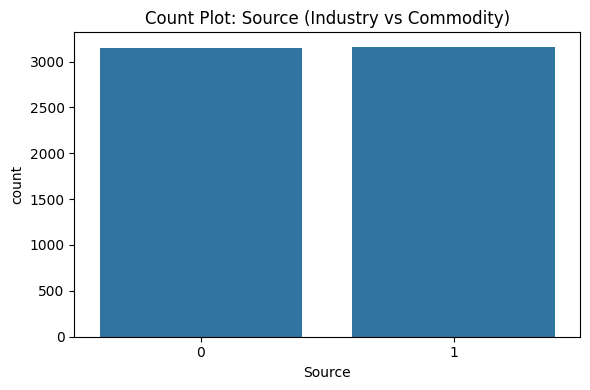

In [57]:
# Count plot for Source
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Source"])
plt.title("Count Plot: Source (Industry vs Commodity)")
plt.tight_layout()
plt.show()

In [58]:
df.columns

Index(['Substance', 'Unit', 'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source'],
      dtype='object')

### Multivariate Anslysis

##### Correlation heatmap

In [60]:
import numpy as np
df.select_dtypes(include=np.number).corr() # Checking correlation between numerical features 

,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source
Substance,1.000000e+00,7.745967e-01,-0.394371,-0.219299,-0.423370,0.164724,NaN,NaN,0.263445,NaN,6.456482e-16
Unit,7.745967e-01,1.000000e+00,-0.157421,-0.094699,-0.170917,0.091243,NaN,NaN,0.377503,NaN,8.327158e-17
Supply Chain Emission Factors without Margins,-3.943710e-01,-1.574211e-01,1.000000,0.147252,0.964954,-0.099663,NaN,NaN,0.139361,NaN,2.627221e-02
Margins of Supply Chain Emission Factors,-2.192988e-01,-9.469896e-02,0.147252,1.000000,0.401649,-0.077987,NaN,NaN,0.077274,NaN,-6.842290e-02
Supply Chain Emission Factors with Margins,-4.233704e-01,-1.709175e-01,0.964954,0.401649,1.000000,-0.112954,NaN,NaN,0.149479,NaN,6.184311e-03
DQ ReliabilityScore of Factors without Margins,1.647243e-01,9.124309e-02,-0.099663,-0.077987,-0.112954,1.000000,NaN,NaN,0.097071,NaN,-7.777440e-03
DQ TemporalCorrelation of Factors without Margins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DQ GeographicalCorrelation of Factors without Margins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DQ TechnologicalCorrelation of Factors without Margins,2.634449e-01,3.775026e-01,0.139361,0.077274,0.149479,0.097071,NaN,NaN,1.000000,NaN,2.768987e-02
DQ DataCollection of Factors without Margins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
df.info() # Checking data types and non-null counts after mapping 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6312 entries, 0 to 6311
Data columns (total 11 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Substance                                               6312 non-null   int64  
 1   Unit                                                    6312 non-null   int64  
 2   Supply Chain Emission Factors without Margins           6312 non-null   float64
 3   Margins of Supply Chain Emission Factors                6312 non-null   float64
 4   Supply Chain Emission Factors with Margins              6312 non-null   float64
 5   DQ ReliabilityScore of Factors without Margins          6312 non-null   int64  
 6   DQ TemporalCorrelation of Factors without Margins       6312 non-null   int64  
 7   DQ GeographicalCorrelation of Factors without Margins   6312 non-null   int64  
 8   DQ TechnologicalCorrelation of Factors

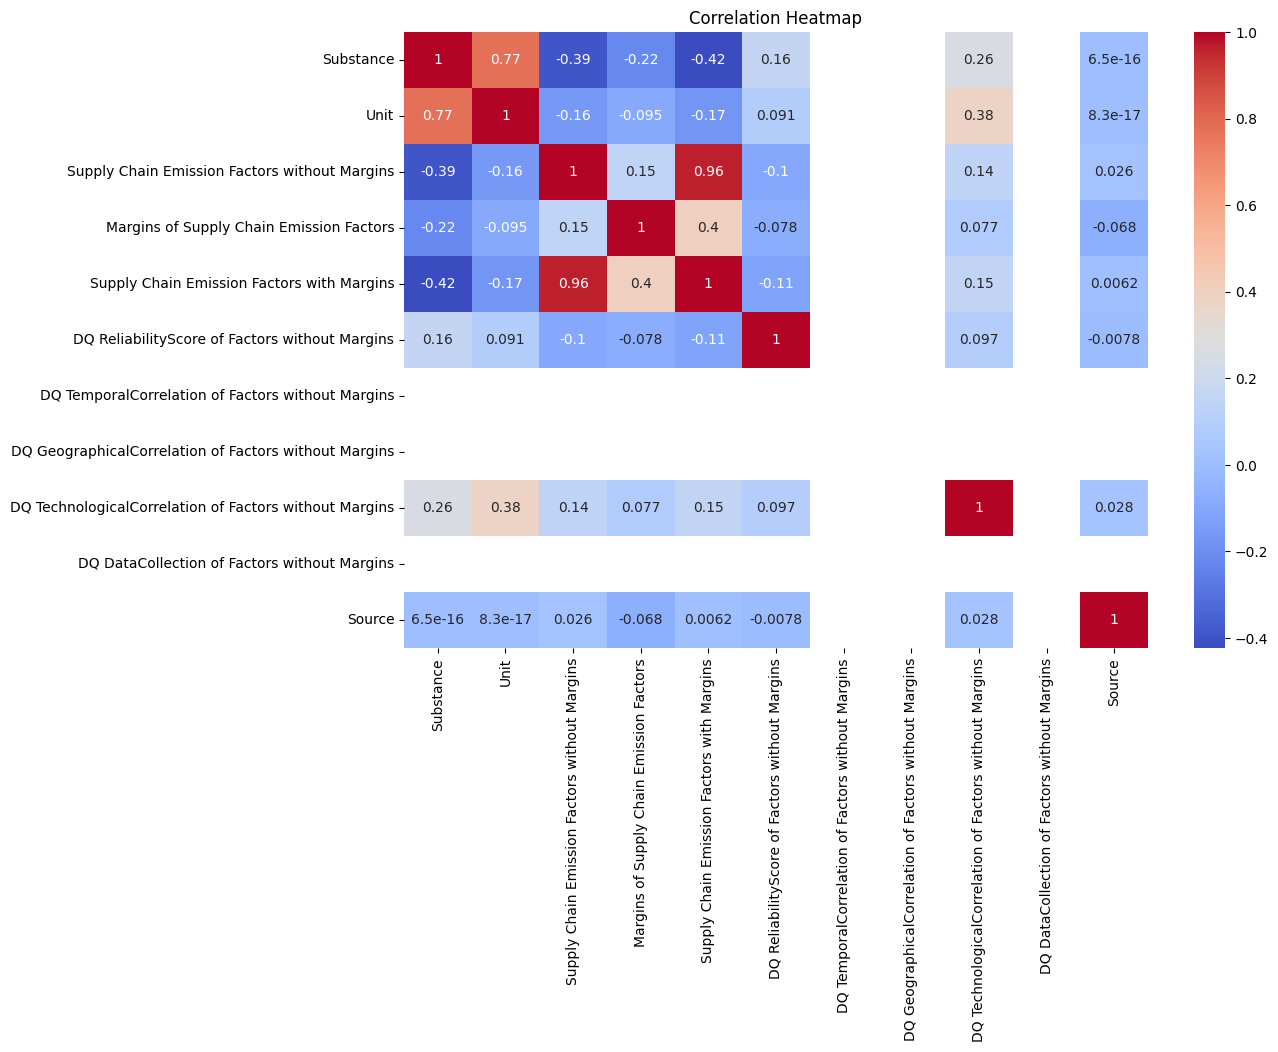

In [62]:
# Correlation matrix 
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()